In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [11]:
df=pd.read_csv('HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [12]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [13]:
#this ia a classification problem ,now we know we have to classify  employee attrition (reduction in staff)

In [14]:
df.shape

(1470, 35)

In [15]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [16]:
# data types: int64(26), object(9)

In [17]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [19]:
#object type=Attrition ,BusinessTravel ,Department , EducationField ,Gender,JobRole, MaritalStatus , Over18, OverTime

In [20]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [21]:
#lets check the null values
df.isnull().sum()


Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [22]:
#so no null values

In [23]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [24]:
#lets use labelencoder to convert target class into integers
#from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()
#le.fit(df['Attrition'])
#df['Attrition']=le.transform(df['Attrition'])
#df


#i did it just to check on what correlation with atrrition
#to  focus visualisation on those correlated column

In [25]:
#df.corr()

In [26]:
# we drop employee number in the dataset as it does not help 
df.drop(columns=["EmployeeCount"],inplace=True)

In [27]:
#lets drop useless columns
df.drop(columns=["StandardHours"],inplace=True)

Attrition visualisation

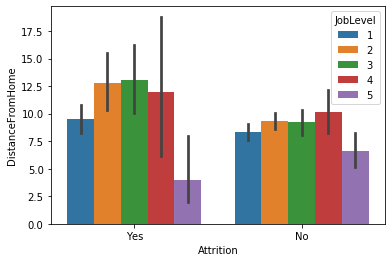

In [28]:
sns.barplot(x = 'Attrition', y = 'DistanceFromHome', hue="JobLevel", data =df)

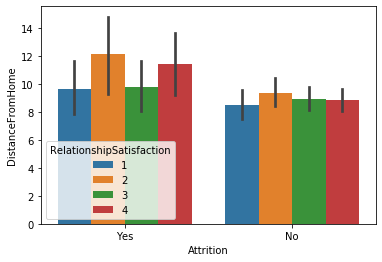

In [29]:
sns.barplot(x = 'Attrition', y = 'DistanceFromHome', hue="RelationshipSatisfaction", data =df)

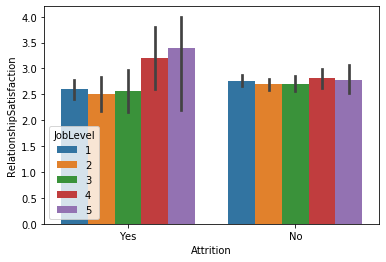

In [30]:
sns.barplot(x = 'Attrition', y = 'RelationshipSatisfaction', hue="JobLevel", data =df)

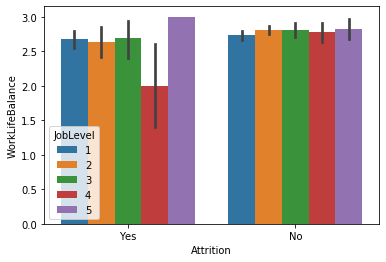

In [31]:
sns.barplot(x = 'Attrition', y = 'WorkLifeBalance', hue="JobLevel", data =df)

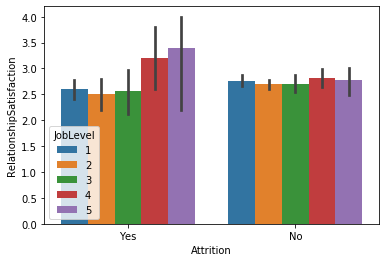

In [32]:
sns.barplot(x = 'Attrition', y = 'RelationshipSatisfaction', hue="JobLevel", data =df)

In [ ]:
#joblevel 4,5 attrition rate is high

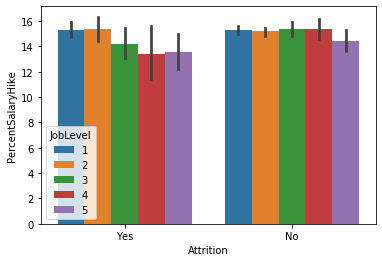

In [34]:
sns.barplot(x = 'Attrition', y = 'PercentSalaryHike', hue="JobLevel", data =df)

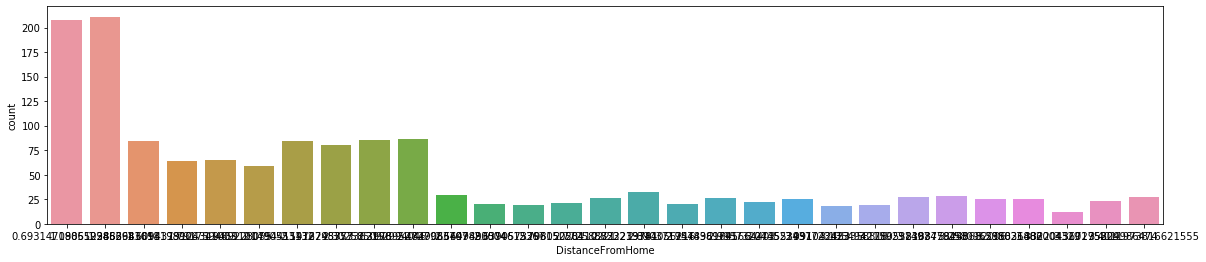

In [106]:
plt.figure(figsize=(20,4))
sns.countplot(df.DistanceFromHome)

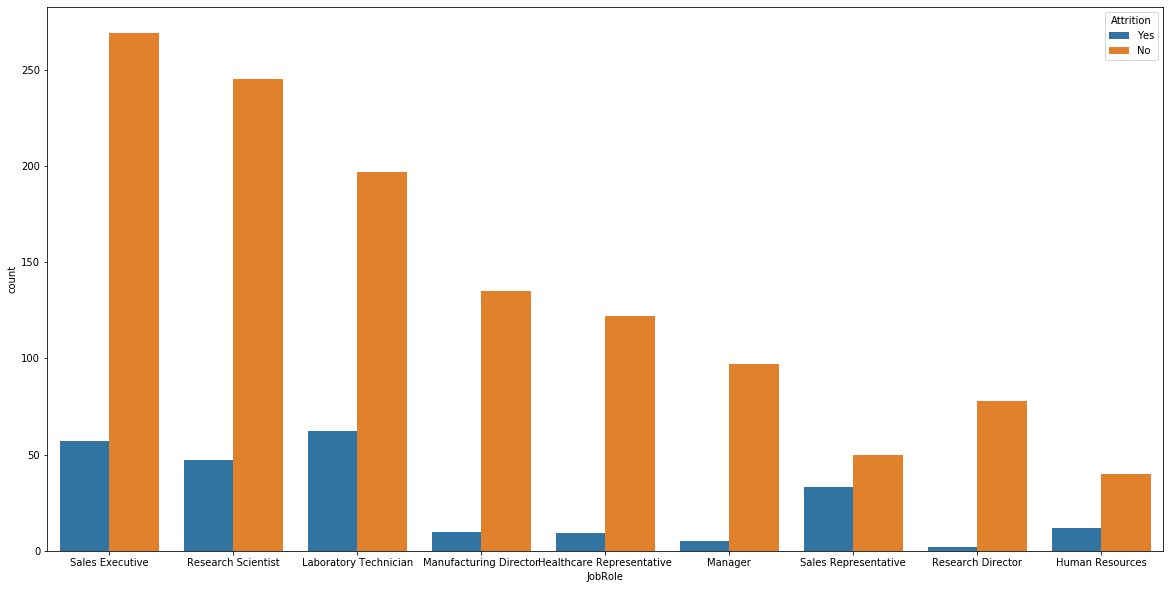

In [35]:
plt.figure(figsize=(20,10))
sns.countplot(x="JobRole",hue="Attrition",data=df)

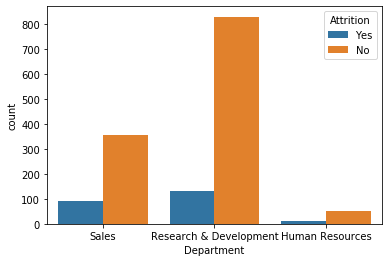

In [36]:
sns.countplot(x="Department",hue="Attrition",data=df)

In [37]:
#sales departmment attrition is high

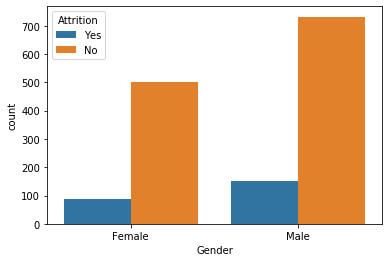

In [38]:
sns.countplot(x="Gender",hue="Attrition",data=df)

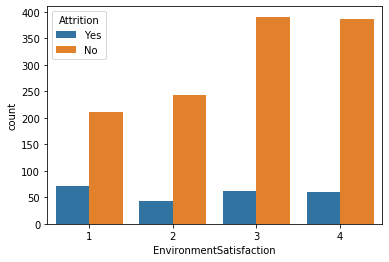

In [39]:
sns.countplot(x="EnvironmentSatisfaction",hue="Attrition",data=df)

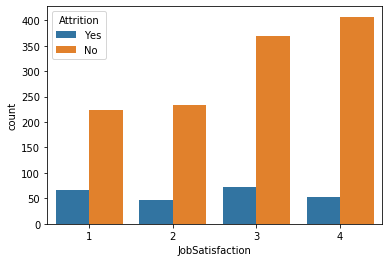

In [40]:
sns.countplot(x="JobSatisfaction",hue="Attrition",data=df)

In [41]:
#higher job satisfaction  reduces attrition(leaving of employee)

In [42]:
#EnvironmentSatisfaction Level 1 has high attrition rate
#Attrition raltes are high in the Sales Deparment, Male,Jobsatisfaction 1

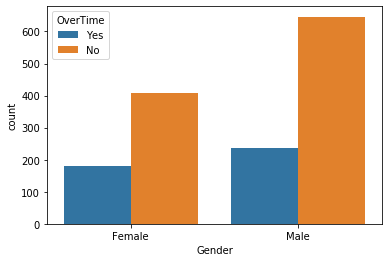

In [43]:
sns.countplot(x="Gender",hue="OverTime",data=df)

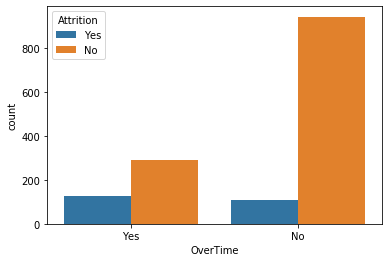

In [44]:
sns.countplot(x="OverTime",hue="Attrition",data=df)

In [45]:
#attrition can be due to overtime

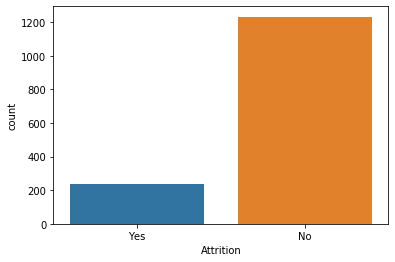

In [116]:
sns.countplot(x='Attrition',data=df)

In [117]:
#so this is an imbalanced dataset

In [46]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [47]:
import numpy as np
for index in df.skew().index:
    if df.skew().loc[index]>0.5:
        df[index]=np.log1p(df[index])
    if df.skew().loc[index]<-0.5:
        df[index]=np.square(df[index])

In [48]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome           -0.029121
Education                  -0.289681
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobSatisfaction            -0.329672
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
PercentSalaryHike           0.513543
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.271963
TotalWorkingYears           0.322355
TrainingTimesLastYear       0.492375
WorkLifeBalance             0.301318
YearsAtCompany             -0.207708
YearsInCurrentRole         -0.383498
YearsSinceLastPromotion     0.718805
YearsWithCurrManager       -0.357686
dtype: float64

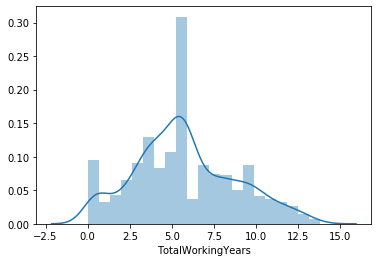

In [49]:
sns.distplot(df['TotalWorkingYears'])

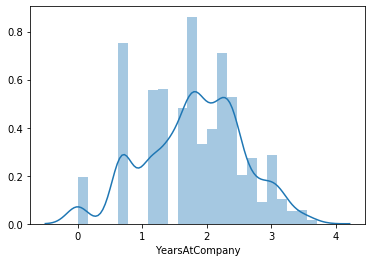

In [50]:
sns.distplot(df['YearsAtCompany'])

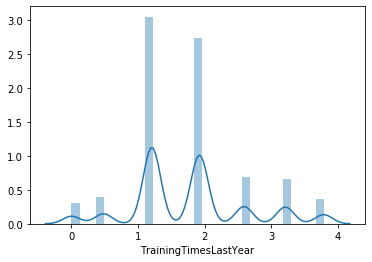

In [51]:

sns.distplot(df['TrainingTimesLastYear'])

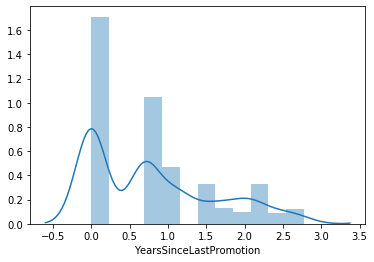

In [52]:

sns.distplot(df['YearsSinceLastPromotion']) 

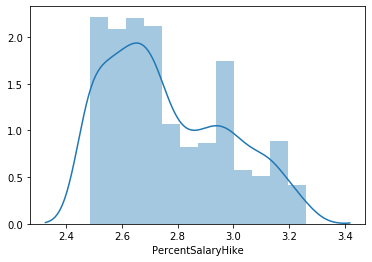

In [53]:
sns.distplot(df['PercentSalaryHike']) 

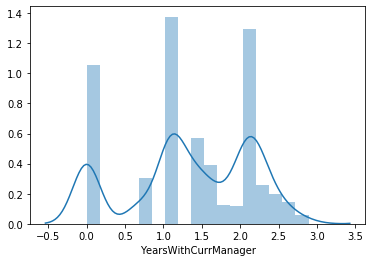

In [54]:
sns.distplot(df['YearsWithCurrManager'])

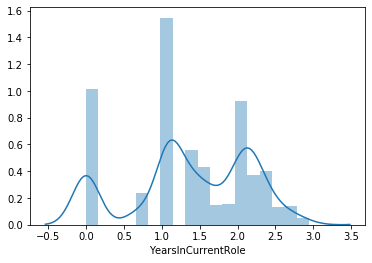

In [55]:
sns.distplot(df['YearsInCurrentRole'])

In [56]:
#skewness over

In [57]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,0.693147,2,Life Sciences,1,2,...,1.386294,1,0.000000,4.827796,0.000000,1,1.945910,1.609438,0.000000,1.791759
1,49,No,Travel_Frequently,279,Research & Development,2.197225,1,Life Sciences,2,3,...,1.609438,4,0.693147,5.749902,1.921812,9,2.397895,2.079442,0.693147,2.079442
2,37,Yes,Travel_Rarely,1373,Research & Development,1.098612,2,Other,4,4,...,1.386294,2,0.000000,4.324077,1.921812,9,0.000000,0.000000,0.000000,0.000000
3,33,No,Travel_Frequently,1392,Research & Development,1.386294,4,Life Sciences,5,4,...,1.386294,3,0.000000,4.827796,1.921812,9,2.197225,2.079442,1.386294,0.000000
4,27,No,Travel_Rarely,591,Research & Development,1.098612,1,Medical,7,1,...,1.386294,4,0.693147,3.786566,1.921812,9,1.098612,1.098612,1.098612,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,3.178054,2,Medical,2061,3,...,1.386294,3,0.693147,8.354249,1.921812,9,1.791759,1.098612,0.000000,1.386294
1466,39,No,Travel_Rarely,613,Research & Development,1.945910,1,Medical,2062,4,...,1.386294,1,0.693147,5.301898,3.210402,9,2.079442,2.079442,0.693147,2.079442
1467,27,No,Travel_Rarely,155,Research & Development,1.609438,3,Life Sciences,2064,2,...,1.609438,2,0.693147,3.786566,0.000000,9,1.945910,1.098612,0.000000,1.386294
1468,49,No,Travel_Frequently,1023,Sales,1.098612,3,Medical,2065,4,...,1.386294,4,0.000000,8.354249,1.921812,4,2.302585,1.945910,0.000000,2.197225


In [58]:
#df=pd.get_dummies(df,drop_first=True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,0.693147,2,Life Sciences,1,2,...,1.386294,1,0.000000,4.827796,0.000000,1,1.945910,1.609438,0.000000,1.791759
1,49,No,Travel_Frequently,279,Research & Development,2.197225,1,Life Sciences,2,3,...,1.609438,4,0.693147,5.749902,1.921812,9,2.397895,2.079442,0.693147,2.079442
2,37,Yes,Travel_Rarely,1373,Research & Development,1.098612,2,Other,4,4,...,1.386294,2,0.000000,4.324077,1.921812,9,0.000000,0.000000,0.000000,0.000000
3,33,No,Travel_Frequently,1392,Research & Development,1.386294,4,Life Sciences,5,4,...,1.386294,3,0.000000,4.827796,1.921812,9,2.197225,2.079442,1.386294,0.000000
4,27,No,Travel_Rarely,591,Research & Development,1.098612,1,Medical,7,1,...,1.386294,4,0.693147,3.786566,1.921812,9,1.098612,1.098612,1.098612,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,3.178054,2,Medical,2061,3,...,1.386294,3,0.693147,8.354249,1.921812,9,1.791759,1.098612,0.000000,1.386294
1466,39,No,Travel_Rarely,613,Research & Development,1.945910,1,Medical,2062,4,...,1.386294,1,0.693147,5.301898,3.210402,9,2.079442,2.079442,0.693147,2.079442
1467,27,No,Travel_Rarely,155,Research & Development,1.609438,3,Life Sciences,2064,2,...,1.609438,2,0.693147,3.786566,0.000000,9,1.945910,1.098612,0.000000,1.386294
1468,49,No,Travel_Frequently,1023,Sales,1.098612,3,Medical,2065,4,...,1.386294,4,0.000000,8.354249,1.921812,4,2.302585,1.945910,0.000000,2.197225


# Machine learning

In [59]:
x=df.drop(columns=["Attrition"])


In [60]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,0.693147,2,Life Sciences,1,2,Female,...,1.386294,1,0.000000,4.827796,0.000000,1,1.945910,1.609438,0.000000,1.791759
1,49,Travel_Frequently,279,Research & Development,2.197225,1,Life Sciences,2,3,Male,...,1.609438,4,0.693147,5.749902,1.921812,9,2.397895,2.079442,0.693147,2.079442
2,37,Travel_Rarely,1373,Research & Development,1.098612,2,Other,4,4,Male,...,1.386294,2,0.000000,4.324077,1.921812,9,0.000000,0.000000,0.000000,0.000000
3,33,Travel_Frequently,1392,Research & Development,1.386294,4,Life Sciences,5,4,Female,...,1.386294,3,0.000000,4.827796,1.921812,9,2.197225,2.079442,1.386294,0.000000
4,27,Travel_Rarely,591,Research & Development,1.098612,1,Medical,7,1,Male,...,1.386294,4,0.693147,3.786566,1.921812,9,1.098612,1.098612,1.098612,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,3.178054,2,Medical,2061,3,Male,...,1.386294,3,0.693147,8.354249,1.921812,9,1.791759,1.098612,0.000000,1.386294
1466,39,Travel_Rarely,613,Research & Development,1.945910,1,Medical,2062,4,Male,...,1.386294,1,0.693147,5.301898,3.210402,9,2.079442,2.079442,0.693147,2.079442
1467,27,Travel_Rarely,155,Research & Development,1.609438,3,Life Sciences,2064,2,Male,...,1.609438,2,0.693147,3.786566,0.000000,9,1.945910,1.098612,0.000000,1.386294
1468,49,Travel_Frequently,1023,Sales,1.098612,3,Medical,2065,4,Male,...,1.386294,4,0.000000,8.354249,1.921812,4,2.302585,1.945910,0.000000,2.197225


In [61]:
y=df['Attrition']
y

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [62]:
dfx=pd.get_dummies(x,drop_first=True)

In [63]:
dfx

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,0.693147,2,1,2,94,3,1.098612,4,...,0,0,0,0,0,1,0,0,1,1
1,49,279,2.197225,1,2,3,61,2,1.098612,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,1.098612,2,4,4,92,2,0.693147,3,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,1.386294,4,5,4,56,3,0.693147,3,...,0,0,0,0,1,0,0,1,0,1
4,27,591,1.098612,1,7,1,40,3,0.693147,2,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,3.178054,2,2061,3,41,4,1.098612,4,...,1,0,0,0,0,0,0,1,0,0
1466,39,613,1.945910,1,2062,4,42,2,1.386294,1,...,0,0,0,0,0,0,0,1,0,0
1467,27,155,1.609438,3,2064,2,87,4,1.098612,2,...,0,0,1,0,0,0,0,1,0,1
1468,49,1023,1.098612,3,2065,4,63,2,1.098612,2,...,0,0,0,0,0,1,0,1,0,0


In [64]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(dfx)
newx=sc.transform(dfx)
newx=pd.DataFrame(newx,columns=dfx.columns)

In [65]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y

array([1, 0, 1, ..., 0, 0, 0])

In [66]:
#May be we have to resize it lets check that later

In [102]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(newx,y,test_size=0.30,random_state=42)

In [103]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')


model=[LogisticRegression(), GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of LogisticRegression() is:
0.8798185941043084
[[362  18]
 [ 35  26]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       380
           1       0.59      0.43      0.50        61

    accuracy                           0.88       441
   macro avg       0.75      0.69      0.71       441
weighted avg       0.87      0.88      0.87       441



Accuracy score of GaussianNB() is:
0.7210884353741497
[[275 105]
 [ 18  43]]
              precision    recall  f1-score   support

           0       0.94      0.72      0.82       380
           1       0.29      0.70      0.41        61

    accuracy                           0.72       441
   macro avg       0.61      0.71      0.61       441
weighted avg       0.85      0.72      0.76       441



Accuracy score of SVC() is:
0.8775510204081632
[[377   3]
 [ 51  10]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       380
 

In [91]:
#Lets use SVM
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="accuracy")
clf.fit(newx,y)
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [99]:
#Lets choose svm as our final model and random state 70
#after changing random state manually we got best score at random state 70 even though we use gridsearch
x_train, x_test, y_train, y_test = train_test_split(newx, y,random_state = 70,test_size=0.20,stratify=y)
svc=SVC(kernel="linear",C=1)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

In [100]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("Accuracy score: ",accuracy_score(y_test,y_pred))

Confusion matrix 
 [[239   8]
 [ 25  22]]
f1 score is :  0.5714285714285714
classification report 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       247
           1       0.73      0.47      0.57        47

    accuracy                           0.89       294
   macro avg       0.82      0.72      0.75       294
weighted avg       0.88      0.89      0.88       294

Accuracy score:  0.8877551020408163


In [94]:
#i have tried other model as final model it shows highest accuracy score

In [101]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(svc,newx,y,cv=5,scoring="accuracy").mean())

0.8904761904761905


In [ ]:
#from sklearn.externals import joblib
#joblib.dump(svc,'hranalyticsattrition.obj')

In [132]:
#But this is an imbalanced dataset so we are supposed to use roc_auc_score and smote(oversampling of minority data)


In [118]:
#since it is imbalanced dataset so we will focus on auc-roc score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
def max_aucroc_score(clf,newx,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(newx, y,random_state = r_state,test_size=0.20,stratify=y)
        x_train, y_train = SMOTE().fit_sample(x_train, y_train)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        print("auc roc score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [119]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
lg_clf=LogisticRegression()
max_aucroc_score(lg_clf,newx,y)

auc roc score corresponding to  42  is  0.7133689378930141
auc roc score corresponding to  43  is  0.8096304591265397
auc roc score corresponding to  44  is  0.7726333017486432
auc roc score corresponding to  45  is  0.713885778275476
auc roc score corresponding to  46  is  0.7204754931518649
auc roc score corresponding to  47  is  0.7442932207769833
auc roc score corresponding to  48  is  0.7619950038763028
auc roc score corresponding to  49  is  0.7159100697734516
auc roc score corresponding to  50  is  0.7979584804892755
auc roc score corresponding to  51  is  0.8228098888793177
auc roc score corresponding to  52  is  0.7726763717805152
auc roc score corresponding to  53  is  0.7974416401068137
auc roc score corresponding to  54  is  0.7407184081316219
auc roc score corresponding to  55  is  0.7326212421397191
auc roc score corresponding to  56  is  0.801016452752175
auc roc score corresponding to  57  is  0.7305969506417435
auc roc score corresponding to  58  is  0.7250409165302782

51

In [120]:
from sklearn.model_selection import cross_val_score
print("Mean roc auc score for logistic classifier: ",cross_val_score(lg_clf,newx,y,cv=5,scoring="roc_auc").mean())
print("standard deviation in roc auc score for logistic classifier: ",cross_val_score(lg_clf,x,y,cv=5,scoring="roc_auc").std())
print(cross_val_score(lg_clf,newx,y,cv=5,scoring="roc_auc"))

Mean roc auc score for logistic classifier:  0.8419119192753216
standard deviation in roc auc score for logistic classifier:  nan
[0.84290312 0.84163279 0.83538634 0.81557412 0.87406323]


In [121]:
#Lets use SVM
from sklearn.svm import SVC
svc1=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc1, parameters, cv=5,scoring="roc_auc")
clf.fit(newx,y)
clf.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [122]:
svc1=SVC(kernel="linear",C=0.1)
max_aucroc_score(svc1,newx,y)

auc roc score corresponding to  42  is  0.7255146868808683
auc roc score corresponding to  43  is  0.8096304591265397
auc roc score corresponding to  44  is  0.7852958911189595
auc roc score corresponding to  45  is  0.7285726591437677
auc roc score corresponding to  46  is  0.7473081230080111
auc roc score corresponding to  47  is  0.7351623740201568
auc roc score corresponding to  48  is  0.7381772762511845
auc roc score corresponding to  49  is  0.761004393143251
auc roc score corresponding to  50  is  0.7715996209837196
auc roc score corresponding to  51  is  0.834955637867172
auc roc score corresponding to  52  is  0.7762081143940046
auc roc score corresponding to  53  is  0.7939098974933241
auc roc score corresponding to  54  is  0.7447669911275734
auc roc score corresponding to  55  is  0.7493324145059868
auc roc score corresponding to  56  is  0.7523903867688861
auc roc score corresponding to  57  is  0.7660435868722542
auc roc score corresponding to  58  is  0.7250409165302782

51

In [123]:
#Lets use ada boosting using svm as an estimator
from sklearn.ensemble import AdaBoostClassifier
#parameters={"base_estimator":[dc,lg_clf,svc],"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
ada_clf=AdaBoostClassifier(base_estimator=svc1,algorithm='SAMME')
max_aucroc_score(ada_clf,newx,y)

auc roc score corresponding to  42  is  0.7113877164269101
auc roc score corresponding to  43  is  0.7544577482987338
auc roc score corresponding to  44  is  0.6749504694633474
auc roc score corresponding to  45  is  0.6435524162287881
auc roc score corresponding to  46  is  0.6633215608579551
auc roc score corresponding to  47  is  0.7184942716857611
auc roc score corresponding to  48  is  0.7028167800844173
auc roc score corresponding to  49  is  0.6850719269532259
auc roc score corresponding to  50  is  0.6992419674390559
auc roc score corresponding to  51  is  0.7504522353346541
auc roc score corresponding to  52  is  0.7489017141872685
auc roc score corresponding to  53  is  0.7073391334309589
auc roc score corresponding to  54  is  0.6592729778620035
auc roc score corresponding to  55  is  0.7149194590403998
auc roc score corresponding to  56  is  0.6891205099491774
auc roc score corresponding to  57  is  0.6906279610646913
auc roc score corresponding to  58  is  0.65466448445171

91

In [131]:
#Lets choose svm as our final model and random state 70
x_train, x_test, y_train, y_test = train_test_split(newx, y,random_state = 70,test_size=0.20,stratify=y)
x_train, y_train = SMOTE().fit_sample(x_train, y_train)
svc1=SVC(kernel="linear",C=0.1)
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
print("Confusion matrix \n",confusion_matrix(y_test,y_pred))
print("f1 score is : ",f1_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
print("AUC ROC Score: ",roc_auc_score(y_test,y_pred))
print("Accuracy score: ",accuracy_score(y_test,y_pred))

Confusion matrix 
 [[196  51]
 [  6  41]]
f1 score is :  0.5899280575539568
classification report 
               precision    recall  f1-score   support

           0       0.97      0.79      0.87       247
           1       0.45      0.87      0.59        47

    accuracy                           0.81       294
   macro avg       0.71      0.83      0.73       294
weighted avg       0.89      0.81      0.83       294

AUC ROC Score:  0.8329313463691962
Accuracy score:  0.8061224489795918


In [127]:

import joblib
joblib.dump(svc1,'hranalyticsattritionfinal.obj')

['hranalyticsattritionfinal.obj']